In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def load_video(path, decim = 2, cvtColor = None):
    frames = []
    cap = cv2.VideoCapture(path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if cvtColor:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        it=0
        while it < decim:
            rows, cols = frame.shape[0], frame.shape[1]
            frame = cv2.pyrDown(frame, dstsize=(cols // 2, rows // 2))
            it+=1
        
        frames.append(frame)
    cap.release()
    return frames

def read_video(path, fps = 60, winname ="video"):
    cap = cv2.VideoCapture(path)
    while cap.isOpened():
        ret, frame = cap.read()
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow(winname, gray)
        if cv2.waitKey(1000//fps) == ord('q'):
            break
        if not cv2.getWindowProperty(winname, cv2.WND_PROP_VISIBLE):  # when window is close get out of the loop
            break
    cap.release()
    cv2.destroyAllWindows()
    
def write_video(video, path, fps = 24, codec = 'xvid'):
    dsize = (video[0].shape[1],  video[0].shape[0])
    fourcc = cv2.VideoWriter_fourcc(*codec)
    out = cv2.VideoWriter(path, fourcc, 30, dsize)
    for frame in video:
        out.write(frame)
        
def decim_video(input_path, output_path, decim) -> list:
    decim_video = load_video(input_path, decim=2)
    if decim_video:
        write_video(decim_video, output_path)
        return decim_video
    
def implot(img, title = None, cmap="gray", **kwargs):
    plt.imshow(img, cmap=cmap, **kwargs)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:

#read_video('C:/Users/ac268552/Desktop/VI/Vision industrielle/video/veh2.mp4')
decim = 2
video = decim_video('C:/Users/ac268552/Desktop/VI/Vision industrielle/video/veh2.mp4', 'C:/temp/veh_{}.avi'.format(decim), decim) 
print(video[0].shape)

In [10]:
write_video(video, 'C:/temp/veh_{}.avi'.format(decim))

In [15]:
median_image = np.median(video, axis=0)

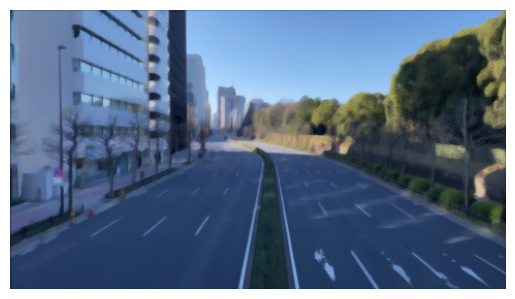

In [18]:
implot(median_image[...,[2,1,0]].astype(np.uint8))

In [23]:
new_video = np.absolute(np.asarray(video,dtype=np.int32) - median_image.astype(np.int32)).astype(np.uint8)


In [30]:
to_list = [new_video[k] for k in range(new_video.shape[0])]

In [31]:
write_video(list(new_video), 'C:/temp/veh_{}_diff.avi'.format(decim))